# QLife Practical Course - Defense systems

We performed plaque assay experiments using phage $\lambda$-vir against six closely related strains from the *E. coli* species. Surprisingly, two of the six strains are much less susceptible to $\lambda$-vir than the other four. We wonder whether this difference in susceptibility could be explained by the presence of a specific antiphage system in the two resistant strains (named *ESCO001.0722.00031* and *ESCO001.0722.01467*) but absent in the four sensitive strains. 

<center><img src="images/phage-bacteria_interactions.png" alt="plaque assay" width="500" height="300"></center>

    
We sequenced the genome of the six *E. coli* strains, as well as of the rest of the strains we have in the lab ($n=73$). These genomes are stored in the file `data/genomes/All_genomes.prt` in [fasta format](https://fr.wikipedia.org/wiki/FASTA_(format_de_fichier)). We will use the bioinformatics tools in our hands to assess whether candidate defense systems could explain resistance to $\lambda$-vir and might be worth characterizing experimentally in the lab.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 

lab_strains = ["ESCO001.0722.00981.C001", "ESCO001.0722.01467.C001", "ESCO001.0722.00296.C001", "ESCO001.0722.01632.C001", "ESSP004.0722.00001.C001", "ESCO001.0722.00031.C001"]
resistant_lab_strains = ["ESCO001.0722.00031.C001", "ESCO001.0722.01467.C001"]
sensitive_lab_strains = ["ESCO001.0722.00981.C001", "ESCO001.0722.00296.C001", "ESCO001.0722.01632.C001", "ESSP004.0722.00001.C001",]

## 1. Characterizing the arsenal of defense systems encoded in bacterial strains

### Detecting defense systems in a genome using DefenseFinder
DefenseFinder ([Tesson et al. 2022](https://www.nature.com/articles/s41467-022-30269-9)) is an algorithm that allows to detect, in bacterial genomes, all the encoded antiphage defense systems described in the literature. DefenseFinder takes a genome (or a list of genomes) in fasta format as input, and outputs: 
- The list of identified defense systems in the "`*_defense_finder_systems.tsv`" file (one line per detected defense system) ; 
- The list of genes involved in the defense systems in "`*_defense_finder_genes.tsv`" file (one line per gene in the detected defense systems). This is useful because many defense systems are actually composed of several proteins and not just one ;
For single protein defense systems, DefenseFinder detects the system in a genome if the gene encoding the defense system is found in the genome. For multi-protein defense systems, DefenseFinder detects the system in a genome if the genes encoding for each component of the defense system are found *next to each other* in the genome. 

__Practical session__

To identify which defense systems are present in the genome our strains of interest (as well as in the rest of the database), we will use DefenseFinder

**Questions**: 

1. How many defense systems are found in the database ? How many systems are found per genome ("`replicon`") on average ?
2. What are the defense systems found in the genomes of our *XXX* strains of interest ? In particular, could the presence of specific defense systems explain the resistance of strain *XXX* explain its resistance to phage $\lambda$-vir ? 

*Bonus questions*:

3. How many proteins are present in the dataset of genomes ? From how many different genomes ? In the database, the accession of a given protein is in the format `genome_proteinid`, e.g. the 1458th protein in the genome `ESCO001.0722.00008.C001` will have accession `ESCO001.0722.00008.C001_01458`. You can use the `seqkit` package, accessible from a terminal or from the jupyter notebook (in a cell starting with the `%%bash` header to execute bash commands). 
4. What is the distribution of the number of defense systems per genome *within each species* ? How many different system types are present per genome within each species ? In the database, the accession of a given genome starts with the two first letters of the genus and the two first letters of the species, e.g. the 8th genome of ***ES**cherichia **CO**li* will have the following accession `ESCO001.0722.00008.C001`.

### Running DefenseFinder

In [ ]:
%%bash

# Create directory where results will be stored
mkdir -p results/1_defense_finder

# Run DefenseFinder on the dataset of genomes
defense-finder run --db-type gembase --models-dir data/models --out-dir results/1_defense_finder -w 8 data/genomes/All_genomes.prt

### Loading defense finder results


In [ ]:
df_sys = pd.read_csv("results/1_defense_finder/All_genomes_defense_finder_systems.tsv", sep="\t")
df_genes = pd.read_csv("results/1_defense_finder/All_genomes_defense_finder_genes.tsv", sep="\t")

df_sys["replicon"] = df_sys["sys_id"].apply(lambda x: x.split("_")[0])
df_sys["species"] = df_sys["sys_id"].apply(lambda x: x[:7])

df_genes.head(3)

In [ ]:
df_sys.head(3)

<div class="alert alert-info">

There are two tables, one per system (`df_sys`), the other per gene (`df_genes`). They can be linked by the column `sys_id`. 

<strong> Useful columns from both file to understand : </strong>

- sys_id : identifier of the system (genes in lines 1 and 2 are part of the same system in `df_genes.head(3)` above)
- type/subtype : Type and subtype of defense system. It can be used to know more about a defense system on the wiki : `https://defensefinder.mdmlab.fr/wiki/defense-systems/{type}`, with the type in lower case.
- Replicon : identifier of the chromosome in which a system has been found
- hit_id : idenfifier of the gene (same as replicon appended with `_proteinNumber`)
- gene_name : name of the model that hit a given gene.
</div>

### 1. How many defense systems are found in the database ? How many systems are found per genome on average ?

<div class="alert alert-warning">
<strong> How many defense systems did you find ? How many per genome ? </strong>
    
Beware, in the following code, typo are inserted, fix them to answer.
</div>

<div class="alert alert-info">
<strong> Beware, in the code blocks, typo are sometimes inserted, fix them to continue or get the answer</strong>
    
</div>

In [ ]:
### Total number of defense systems


### Number of defense systems per genome


<details><summary><div class="alert alert-success">
<strong>Answer</strong></div></summary>

Code solution

```
### Total number of defense systems

print(f"Number of identified defense systems : {len(fd_sys)}.") # <-- Exemple of typo : the variable name is not the good one. Running the cell will show you where the problem is

### Number of defense systems per genome
n_sys_per_genome = df_genes.groupby("replicon")["sys_id"].nunique().sort_values()

print(f"On average, a genome contains {n_sys_per_genome.mean():.02f} +- {n_sys_per_genome.std():.02f} defense systems.")

sns.histplot(n_sys_per_genome, color="C1")
```
plt.axvline(n_sys_per_genome.mean(), color="C2", lw=2)

plt.xlabel("Number of defense systems in a genome")

plt.tight_layout()

</details>

### 2. What are the defense systems found in the genomes of our 6 strains of interest ? 

<div class="alert alert-warning">
<strong> In particular, could the presence of specific defense systems explain the resistance of some of the lab strains to the phage lambda-vir ? </strong>

Remember that we have 3 variables : 
- `lab_strains` : list of all lab strains, split in 2 sublists : 
    - `sensitive_lab_strains` : list of sensitive strains
    - `resistant_lab_strains` : list of resistant strans

</div>


In [ ]:
# Find defense system present inside the lab strains

<details><summary><div class="alert alert-success">
<strong>Answer</strong></div></summary>
Code solution:
</br>

```
ds_in_lab_strains = df_sys.loc[df_sys["replicon"].isin(my_strains)].pivot(index="replicon", columns="type", values="sys_id")

ds_in_lab_strains
```
</br>

We do *not* observe differences between the antiphage arsenal of the six strains (the 4 sensitive strains and the 2 resistant ones). They all encode three types of defense systems, namely [Hachiman](https://defensefinder.mdmlab.fr/wiki/defense-systems/hachiman), [Lit](https://defensefinder.mdmlab.fr/wiki/defense-systems/lit) and [RnlAB](https://defensefinder.mdmlab.fr/wiki/defense-systems/rnlab) (you can visit their dedicated page on the [DefenseFinder wiki](https://defensefinder.mdmlab.fr/wiki/) for more information).

We can thus conclude the presence of specific antiphage systems *cannot* explain the resistance of strains `ESCO001.0722.00031.C001` and `ESCO001.0722.01467.C001` to $\lambda*-vir.
</details>

### 3. [Bonus] How many proteins are present in the dataset of genomes ? From how many different genomes ?

<div class="alert alert-warning">
<strong> </strong>

A protein's ID has the following schema: `<speciesID>.<date>.<genome>.<replicon>_<protein_number>`

`-F` in `awk` specifies the separator of columns, which then are accessible with `$1` for the first column, `$2` for the second, etc.

Fix the separator below to obtain the number of genome and species, given that in this dataset, all genomes have a single replicon.


</div>

In [ ]:
# Use bash and seqkit


<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>

Code solution:

```
%%bash

seqkit stat data/genomes/All_genomes.prt

n_genomes=$(grep ">" data/genomes/All_genomes.prt | awk -F"XXX" '{print $1}' | sort -u | wc -l)
echo "#Genomes in the dataset: ${n_genomes}"

n_species=$(grep ">" data/genomes/All_genomes.prt | awk -F"XXX" '{print $1}' | sort -u | wc -l)
echo "#Species in the dataset: ${n_species}"
```
</br>
There are 347808 proteins, 79 Genomes and 34 species
</details>

### 4. [Bonus] What is the distribution of the number of defense systems per genome *within each species* ?


In [ ]:
# Filter out species with less than 3 genomes


# Group by the variable


#Plot the results


<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>

Code solution:

```
# Filter out species with less than 3 genomes
grp_by_species = df_sys.groupby('species')
filtered_species = grp_by_species.filter(lambda x: len(x["replicon"].unique()) >= 3)

# Group by the variable
per_species = filtered_species.groupby(["genus", "replicon"])["sys_id"].size().reset_index().rename({"sys_id": "n_sys_in_genome"}, axis=1)

#Plot the results
sns.displot(data=per_species, 
            x="n_sys_in_genome",
            bins=range(0,8),
            col="species", col_wrap=4,
            height=2,)
```
</br>


</details>

## 2. Distribution of defense systems within a bacterial genome

**Questions**:
1. Where are the antiphage systems located in the genomes of strains ESCO001.0722.00823.C001, MOWI001.0722.00004.C001 and ENHO001.0722.00164.C001 ? What do you observe regarding the distribution of defense systems within the genome ?
2. Compute more systematically the frequency at which two defense systems colocalize in bacterial genomes for all the defense systems detected by DefenseFinder.
3. What is the probability of observing such phenomenon at random ? You can randomly sample genes from the database (e.g. 1000 times) and estimate how frequently they are located near a known defense system. 
4. What do you conclude ?

### 1. Where are defense systems located ?

In the genome of strains ESCO001.0722.00823.C001, MOWI001.0722.00004.C001 and ENHO001.0722.00164.C001, we will plot where are the systems along the chromosome.

<div class="alert alert-warning">
<strong> What do you observe ?</strong>
</div>

In [ ]:
# Plot the localisation of all defense systems in different genomes

<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>

Code solution:

```
fig, axes = plt.subplots(3, 1, figsize=(10, 6))

for genome, ax in zip(["ESCO001.0722.00823.C001", "MOWI001.0722.00004.C001", "ENHO001.0722.00164.C001"], axes.ravel()):
    genome_size = 4000  # number of genes in genome
    ds_locations = df_sys.loc[df_sys["replicon"] == genme, "sys_beg"].apply(lambda x: x.split("_")[1]).astype(int).values

    print(f"There are {ds_locations.shape[0]} defense systems in genome {genome}. Defense systems start at positions : {sorted(ds_locations)}.")

    # Create a series with location of defense systems
    ds_in_genome = pd.Series([0]*genome_size, name='Chromosome')
    for location in ds_locations:
        if location < genome_size:
            ds_in_genome[location] = 1

    # Plot the chromosome
    ax.plot(range(0, genome_size), ds_in_genome.values, lw=0.5)
    ax.set_xlabel('Location')
    ax.set_ylabel('Gene')
    ax.set_title(genome)

plt.tight_layout()
```
</details>

### 2. Compute more systematically the frequency at which two defense systems colocalize in bacterial genomes for all the defense systems detected by DefenseFinder.


In [ ]:
import itertools

neighbourhood_dist = 15


<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>

Code solution:

```

neighbourhood_dist = 15
count = 0
for chromosome, grp in df_sys.groupby("replicons"):  # Iterate on chromosomes/genome
    pairs = itertools.permutations(grp['sys_id'], 2)  # Iterate on non-rendundant pairs
    for (df1, df2) in pairs:
        df1_beg = int(grp.loc[grp['sys_id'] == df1, 'sys_beg'].values[0].split("_")[1]) 
        df2_beg = int(grp.loc[grp['sys_id'] == df2, 'sys_beg'].values[0].split("_")[1])
        if np.abs(df1_beg - df2_beg) < neighbourhood_dist:
            count += 1

print(f"Observed {count} / {len(fd_sys)}  ({count / len(df_sis) * 100:.02f}%) events of co-localization between defense systems.")
```

</details>

### 3. What is the probability of observing such phenomenon at random ?
<div class="alert alert-warning">

We randomly sample genes from the database, assess whether they are located nearby a known defense system and estimate the frequency of observing colocalization with defense systems at random

<strong> What do you conclude ?</strong>

</div>



In [ ]:
from utils import has_ds_nearby

# has_ds_nearby take as input: a protein_id, a table of defense system genes and a neighbourhood size

genome_size = 5000 # In the dataset, strains encode all around 5000 proteins


<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>

Code solution:

```
count = 0
genome_size = 5000
n_repl = 1
for k in range(n_repl):
    samp_chrom = np.random.choice(df_sys["replicon"].unique())
    samp_position = "{:05}".format(np.random.randint(low=1, high=genome_size))
    samp_gene = f"{samp_chrom}_{samp_position}"

    if has_ds_nearby(samp_gene, df_genes, neighbourhood_size=15):
        count += 1

print(f"Observed {count} / {n_repl}  ({count / n_repl *100:.02f}%) events of co-localization between a gene taken at random and a defense systems.")

```

</details>

We observe that the antiphage defense systems tend to colocalize within bacterial genomes. This phenomenon has been described in the literature and has led to an explosion in the discovery of antiphage defense systems and thus the boom of the antiphage systems field starting from 2018 (more than 100 new types on antiphage systems discovered in less than five years). The regions on co-localization of defense systems are named [defense islands](https://defensefinder.mdmlab.fr/wiki/general-concepts/defense-islands) (by analogy to e.g. pathogenicity islands).

The reasons why defense systems tend to colocalize are still debated. This could be the result of antiphage systems being frequently exchanged between bacterial genomes through horizontal transfer (see the rest of the course for more information on this) or it could also be a consequence of coregulation in the expression of diverse antiphage systems.


For more information on defense islands, see the following seminal papers [Makarova et al. (2011)](https://journals.asm.org/doi/full/10.1128/jb.05535-11) [Doron et al. (2018)](https://www.science.org/doi/full/10.1126/science.aar4120?casa_token=ggW_drdC-rIAAAAA%3Aj_Sp8rXeQCBzJ3iaILkHZUap4UNH2SEJVhXHdJJSJ707I3gsXdXPWkSTIrgBC9nmoOcnP4GIA69mBg), [Gao et al. (2020)](https://www.science.org/doi/full/10.1126/science.aba0372?casa_token=z8tMXlLOrUEAAAAA%3AtlpOetUD4NBvB4hZpXD6D9XY7w9RgX-XrrRuIptnfk95SEM_UvI43SkmtUb0TvIKaT4C1cF-OyPt7Q).

# 2. Identifying a novel antiphage system in the bacterial strains genome

Could the presence of an undetected antiphage defense system in strains `ESCO001.0722.01467.C001` and `ESCO001.0722.00031.C001` but absent in strains `ESCO001.0722.00981.C001`, `ESCO001.0722.00296.C001`, `ESSP004.0722.00001.C001` and `ESCO001.0722.01632.C001` explain the difference in susceptibility to phage $\lambda$-vir ? We will exploit the colocalization of defense systems within defense islands to assess the existence of a candidate antiphage system in the two resistant strains.

1. We will start by clustering all the proteins in the dataset to compute a *defensive score* per cluster. Use the `MMseqs` software to cluster proteins at 30% identity and 80% coverage.
2. For each cluster, compute the defense score which the number of cluster which the number of cluster members which have a defense system nearby over the total number of cluster members. Use the `has_df_nearby` function which tells whether a given protein has defense systems in its genomic neighbourhood. 
3. Draw the defense score of each cluster as a function of the number of members of the cluster.

## Clustering

We use the `MMseqs` software to cluster proteins at 70% identity and 80% coverage

In [ ]:
%%bash

input_fasta="data/genomes/All_genomes.prt"
perc_identity=0.7
perc_coverage=0.8
output_path="results/2_mmseqs/all_proteins_${perc_identity}-${perc_coverage}"

mkdir -p results/2_mmseqs

# Cluster sequences
mmseqs easy-cluster --threads 8 ${input_fasta} ${output_path} results/2_mmseqs/tmp --min-seq-id ${perc_identity} -c ${perc_coverage} -v 0

<div class="alert alert-warning">

<strong> How many clusters are there ?</strong>
- In bash, you can print the first of the two columns of `all_proteins_0.7-0.8_cluster.tsv` file, sort it and take unique values (`-u` of sort), and count how many lines you have (`wc -l`).
- In pandas, the method `.value_counts()` is equivalent to the `sort | uniq -c` in bash, and `.nunique()` is equivalent to the bash version above.

</div>

In [ ]:
mmseqs_clusters = pd.read_csv("results/2_mmseqs/all_proteins_0.7-0.8_cluster.tsv", sep="\t", header=None).rename({0: "cluster", 1: "gene"}, axis=1)

In [ ]:
mmseqs_clusters

## Compute Defense score

For each cluster, we computed the defense score which is the number of cluster which the number of cluster members which have a defense system nearby over the total number of cluster members. 

We use the `has_df_nearby` function, which tells whether a given protein has defense systems in its genomic neighborhood.

We precomputed this score, but you'll find the code below.

```python
from utils import has_ds_nearby
import tqdm


ds_scores = []
for c, clust in tqdm.tqdm(mmseqs_clusters.groupby("cluster")):
    # Count how many genes from the cl
    n_near_ds = np.sum([has_ds_nearby(row["gene"], df_genes, neighbourhood_size=15) for i, row in clust.iterrows()])
    
    # Assess whether cluster contains proteins from the two lab strains resistant to the phage
    clust["replicon"] = clust["gene"].apply(lambda x: x.split("_")[0])
    ds_scores.append({"cluster": c, "n_members": clust.shape[0], "defensive_score": n_near_ds / clust.shape[0]})

ds_scores = pd.DataFrame(ds_scores)

mmseqs_clusters['replicon'] = mmseqs_clusters['gene'].map(lambda x: x.split('_')[0])

# Find all clusters present in the sensitive strains
cluster_in_sensitive=mmseqs_clusters.loc[mmseqs_clusters.replicon.isin(sensitive_lab_strains)].cluster
# Find all clusters present in the resistant strains
cluster_in_resistant=mmseqs_clusters.loc[mmseqs_clusters.replicon.isin(resistant_lab_strains)].cluster

# Select clusters that are present in resistant strains but not in the sensitive ones
only_resistant=mmseqs_clusters.loc[(mmseqs_clusters.cluster.isin(cluster_in_resistant))&(~mmseqs_clusters.cluster.isin(cluster_in_sensitive))].cluster
ds_scores['only_resistant']=False
ds_scores.loc[ds_scores.cluster.isin(only_resistant),'only_resistant']=True

```


In [ ]:
ds_scores = pd.read_csv("data/ds_score.txt")

In [ ]:
# Draw the defensive scores as a function of number of cluster members

sns.relplot(data=df_scores, x="n_members", y="defensive_score", col="only_resistant", height=4)


<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>
Code solution:

```
# Draw the defensive scores as a function of number of cluster members

sns.relplot(data=df_scores, x="n_members", y="defensive_score", col="only_resistant", height=4)
```

</details>

<div class="alert alert-warning">
    
We identify a single cluster of proteins which contains genes present in the genome of the resistant strains and not in the genome of sensitive strains. Moreover, this cluster of proteins has a defense score ($ds \gt 0.5$) which indicates that proteins in this cluster often colocalize with known antiphage systems. This suggests that these proteins could have antiphage activity.

<strong> Which cluster is it ? Could it explain the difference of phenotype we saw earlier ?</strong>
</div>


In [ ]:
ds_scores[(ds_scores.only_resistant!="aaa") & (ds_scores.defensive_score>-1)]

# 3. Detecting homologs of our candidate defense system in the database of genomes

We will be focusing on the cluster of proteins with accession `ESCO001.0722.00031.C001_02663` which contains proteins present in the two resistant strains (`ESCO001.0722.00031.C001_02663` and `ESCO001.0722.01467.C001_02702`) which seem to be absent from the sensitive strains. The presence of this gene in the genome of the resistant strains could thus explain resistance to phage $\lambda$-vir. We will detect additional homologs of this protein in the dataset to (i) assess whether homologs of this gene are present in other strains of the database and (ii) try to infer the evolutionary history explaining the presence of this gene in the sensitive lab strains vs. in the resistant strains (Section 4. below).

**Questions**:
1. Get the proteins belonging to the same `MMseqs` cluster as ESCO001.0722.00031.C001_02663 and ESCO001.0722.01467.C001_02702 and align them using `MAFFT`.
2. Build a profile HMM from the multiple sequence alignment using the `hmmbuild` function.
3. Use the profile HMM to search for additional homologs of `ESCO001.0722.00031.C001_02663` and `ESCO001.0722.01467.C001_02702` in the database using the `hmmsearch` function. Only keep hits with an `e-value < 1e-5` and a `bit_score > 20`. Do you identify new homologs ?


In [ ]:
mmseqs_clusters[mmseqs_clusters.cluster=="ESCO001.0722.00031.C001_02663"]

## 1. Get the proteins belonging to the same `MMseqs` cluster as ESCO001.0722.00031.C001_02663 and ESCO001.0722.01467.C001_02702 and align them using `MAFFT`.


In [ ]:
%%bash

mkdir -p results/3_align_homologs

clust_name="ESCO001.0722.00031.C001_02663"

grep ${clust_name} results/2_mmseqs/all_proteins_0.7-0.8_cluster.tsv | awk '{print $2}' > results/3_align_homologs/cluster_members.ids
# Retrieve proteins
seqkit grep -f results/3_align_homologs/cluster_members.ids data/genomes/All_genomes.prt > results/3_align_homologs/cluster_members.faa
# Align the genome
mafft results/3_align_homologs/cluster_members.faa > results/3_align_homologs/cluster_members.mafft.fasta

You can open the alignement using the file manager on the left, going `results/3_align_homologs/cluster_members.mafft.fasta`

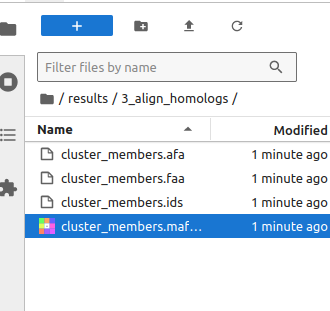

## 2. Build a profile HMM from the multiple sequence alignment using the `hmmbuild` function.


In [ ]:
%%bash

mkdir results/4_homology_search

hmmbuild results/4_homology_search/cluster_members.hmm results/3_align_homologs/cluster_members.mafft.fasta

## 3. Use the profile HMM to search for additional homologs of ESCO001.0722.00031.C001_02663 and ESCO001.0722.01467.C001_02702 in the database using the `hmmsearch` function. Do you identify new homologs ?


In [ ]:
%%bash

file_name="cluster_members"
hmm_profile="results/4_homology_search/cluster_members.hmm"
protein_db="data/genomes/All_genomes.prt"

hmmsearch --cpu 8 -o results/4_homology_search/${file_name}_out.txt --tblout results/4_homology_search/${file_name}_tblout.txt --domtblout results/4_homology_search/${file_name}_domtblout.txt --pfamtblout results/4_homology_search/${file_name}_pftblout.tsv ${hmm_profile} ${protein_db}

cat results/4_homology_search/${file_name}_tblout.txt | grep -v "#" | awk '$5 < 1e-5' > results/4_homology_search/${file_name}_1e-5_tblout.txt
cat results/4_homology_search/${file_name}_1e-5_tblout.txt | awk '{print $1}' > results/4_homology_search/${file_name}_1e-5_tblout.ids
seqkit grep -f results/4_homology_search/${file_name}_1e-5_tblout.ids ${protein_db} > results/4_homology_search/${file_name}_1e-5_hits.faa

<div class="alert alert-warning">
    
<strong>How many proteins did we have in the HMM profile, how many did we find at the end ?</strong>
</div>


# 4. What could be the evolutionary history explaining the presence of the candidate defense system in our strains ?

Finally, we would like to explain how this candidate defense system arrived in the genome of the two resistant bacterial strains whereas it is absent from the genome of the other four (closely-related) strains. Two possible evolutionary scenarii can be envisioned :
- The gene was present in the last common ancestor of all the lab strains and was lost in the sensitive strains but not in the resistant ones.
- The gene was *transferred horizontally* more lately, in the resistant strains but not in the sensitive ones.
To test these hypotheses, we will build a phylogenetic tree of all the identified homologs of the candidate defense system.

/!\ In the beginning of the class we showed you a phylogenetic of bacterial strains, built on their genome. Phylogenetic trees can also be built on single genes/proteins to infer the evolutionary history of the gene/protein. This is for useful because the history of individual genes can sometimes be decoupled of the one of its genome (e.g. when the gene is transferred horizontally).

**Questions**:
1. Align all the identified protein homologs using `MAFFT`.
2. Build a phylogenetic tree from the multiple sequence alignment. 
3. Visualize the tree using [iTol](https://itol.embl.de/) (`Upload` section, and paste the `.nwk` file in the text box)
4. Use the annotation file provided in `results/itol` to color each tree leaf according to its bacterial species of origin. What do you observe ?
5. Conclude.

## 1. Align all the identified protein homologs using `MAFFT`.


In [ ]:
%%bash
file_name="cluster_members"

mkdir results/5_phylogeny



<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>
Code solution:

```
# Draw the defensive scores as a function of number of cluster members

sns.relplot(data=df_scores, x="n_members", y="defensive_score", col="only_resistant", height=4)
```

</details>

## 2. Build a phylogenetic tree from the multiple sequence alignment. 


In [ ]:
%%bash

file_name="cluster_members"

fasttree results/5_phylogeny/${file_name}_1e-5_hits.mafft.fasta > results/5_phylogeny/${file_name}_1e-5_hits.nwk

In [ ]:
from Bio import Phylo
from matplotlib.font_manager import FontProperties
from utils import plot_tree

# load the tree from the file
fix, ax = plt.subplots(1, 2, figsize=(15, 12))
plot_tree("results/5_phylogeny/cluster_members_1e-5_hits.nwk", leaves_to_color=lab_strains, ax=ax[0])
plot_tree("data/Bacterial_tree/Tree_all_genomes.treefile", leaves_to_color=lab_strains+["KLPN001.0722.00637.C001"], ax=ax[1])
ax[0].set_title("Tree of protein")
ax[1].set_title("Tree of genomes")
plt.tight_layout(w_pad=10)
plt.show()

<div class="alert alert-warning">
    
<strong>What do you observe ? What do you conclude ?</strong>
</div>


<details><summary><div class="alert alert-success"><strong>Answer</strong></div></summary>
    
We observe that the proteins from the two resistant strains (`ESCO001.0722.00031.C001_02663` and `ESCO001.0722.01467.C001_02702`) are present "near" a protein from a *Klebsiella pneumoniae* strain (`KLPN001.0722.00637.C001_03403`). More precisely, we say the proteins from the resistant strains and the proteins *Klebsiella* form a monophyletic group ("clade") and that their last common ancestor is very recent (short branches --> few substitutions accumulated since their divergence). The same protein from other *E. coli* strains (e.g. `ESCO001.0722.00617.C001_03085`) are much further away in the tree indicating that their last common ancestor with the protein present in the two strains is much more ancient.

This observation lead us to conclude that, most likely, the unknown antiphage system was acquired by the resistant strains though an event of [Horizontal Gene Transfer (HGT)](https://en.wikipedia.org/wiki/Horizontal_gene_transfer). Exchanges of genetic material is frequent among bacterial strains and can even occur between strains from different species, as observed here. Antiphage defense systems were previously described to be encoded in [Mobile Genetic Elements (MGE)](https://en.wikipedia.org/wiki/Mobile_genetic_elements) which are often exchanged through HGT. 
</details>



# Conclusion

You've made it to the end of this course, congrats !! 

We saw that the resistance of the two strains of interest to $\lambda$-vir is probably due to a novel antiphage system that we identified thanks to its colocalization with known antiphage systems. We could identify homologs of this uncharacterized antiphage system in our database of genomes using profile HMM search. By constructing a phylogenetic tree of these protein homologs, we showed that the presence of the defense system in the two strains is likely to be the result of a horizontal gene transfer from a *Klebsiella* strain. We can now go back to the bench, and better characterize this candidate defense system ; we can for example predict that if we knock-it out from the two resistant strains, susceptibility to phage $\lambda$-vir should restored. 

Hopefully, you are now a bit more familiar with 
- What is a defense system ;
- How to use DefenseFinder to identify known antiphage systems from bacterial genomes (NB: [DefenseFinder](https://defensefinder.mdmlab.fr/) is also available as a webservice) ;
- The fact that defense system tend to colocalize in bacterial genomes ;
- The fact that we can use the colocalization to identify novel antiphage systems ;
- How we can use standard phylogenetic tools to identify the homologs of a protein in a database of genomes ;
- How to build a phylogenetic tree of a set of protein to infer the occurrence of specific evolutionary events, like horizontal gene transfers ; 
- The fact that defense systems are often horizontally transferred across bacterial genomes, including from bacteria belonging to different species.

If you want to learn more about antiphage systems, please look at the diverse articles of this fast evolving field : [Makarova et al. (2011)](https://journals.asm.org/doi/full/10.1128/jb.05535-11), [Doron et al. (2018)](https://www.science.org/doi/full/10.1126/science.aar4120?casa_token=ggW_drdC-rIAAAAA%3Aj_Sp8rXeQCBzJ3iaILkHZUap4UNH2SEJVhXHdJJSJ707I3gsXdXPWkSTIrgBC9nmoOcnP4GIA69mBg), [Gao et al. (2020)](https://www.science.org/doi/full/10.1126/science.aba0372?casa_token=z8tMXlLOrUEAAAAA%3AtlpOetUD4NBvB4hZpXD6D9XY7w9RgX-XrrRuIptnfk95SEM_UvI43SkmtUb0TvIKaT4C1cF-OyPt7Q), [Millman et al. (2020)](https://www.cell.com/cell-host-microbe/fulltext/S1931-3128(22)00473-5?uuid=uuid%3A697053c6-f0aa-4eaf-ab85-34371c504b5a), [Bernheim et al. (2020)](https://www.nature.com/articles/s41579-019-0278-2), [Tesson et al. (2022)](https://www.nature.com/articles/s41467-022-30269-9), [Georjon et al. (2023)](https://www.nature.com/articles/s41579-023-00934-x), [Rousset et al. (2022)](https://www.cell.com/cell-host-microbe/fulltext/S1931-3128(22)00104-4?dgcid=raven_jbs_etoc_email) and many more. You can also visit the [DefenseFinder Wiki](https://defensefinder.mdmlab.fr/wiki/) to get more information about your favourite system.

*The MDM Lab*

<div class="alert alert-success">
    
<strong>To get the Notebook with solutions, execute the following cell, and refresh the file explorer on the left</strong>
</div>

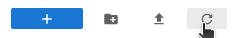

In [ ]:
!mv .solutions solutions